# Tareas

Tarea realizada con ayuda de Dara Menese, Patricio Barber y Fernanda Arelle

<div class="alert alert-warning">
Fecha límite de entrega: 3 de Octubre, 2021 23:59
</div>

In [2]:
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from sympy import Symbol
import sympy as sym
from sympy import *

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

### Solución

In [3]:
beta = sym.symbols('beta')
J = Function('J')
n,y,x,X,Y,m,i = sym.symbols('n,y,x,X,Y,m,i')
b0 = Indexed(beta,0)
b1 =Indexed(beta,1)
exp = 1/(2*m)*Sum((Indexed(y,1)-b0,b1*(Indexed(x,i))**2,(i,1,m))

La expresión que se busca derivar es la siguiente:

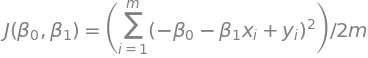

In [25]:
Eq(J(b0,b1),1/(2*m)*Sum((Indexed(y,i)-b0-b1*(Indexed(x,i)))**2,(i,1,m)))

Derivamos primero respecto a  $\beta_0$ 

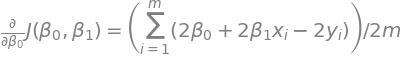

In [26]:
Eq(Derivative(J(b0,b1),b0),Derivative(1/(2*m)*Sum((Indexed(y,i)-b0-b1*(Indexed(x,i)))**2,(i,1,m)),b0).doit())

Y simplificando la expresión anterior se tiene:

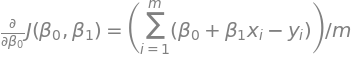

In [30]:
Eq(Derivative(J(b0,b1),b0),1/(m)*Sum((-Indexed(y,i)+b0+b1*(Indexed(x,i))),(i,1,m)))

Derivamos ahora respecto a  $\beta_1$ 

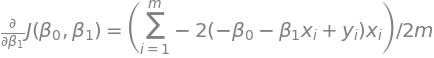

In [29]:
Eq(Derivative(J(b0,b1),b1),Derivative(1/(2*m)*Sum((Indexed(y,i)-b0-b1*(Indexed(x,i)))**2,(i,1,m)),b1).doit())

Y simplificando la expresión anterior se tiene:

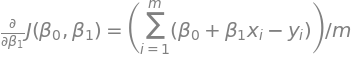

In [31]:
Eq(Derivative(J(b0,b1),b1),1/(m)*Sum((-Indexed(y,i)+b0+b1*(Indexed(x,i))),(i,1,m)))

## Problema 2

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


C:\Users\andyb\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['cbrt', 'test', 'nan', 'pi', 'take', 'reshape', 'sqrt', 'cos', 're', 'floor', 'Number', 'eye', 'Circle', 'Polygon', 'beta', 'cosh', 'sinc', 'solve', 'trunc', 'source', 'minimum', 'sinh', 'ifft', 'interactive', 'fft', 'log', 'diff', 'maximum', 'binomial', 'lcm', 'trace', 'flatten', 'plot', 'diag', 'exp', 'shape', 'gamma', 'conjugate', 'transpose', 'var', 'sin', 'roots', 'tan', 'zeros', 'invert', 'partition', 'seterr', 'poly', 'Line2D', 'vectorize', 'tanh', 'gcd', 'ones', 'det', 'plotting', 'sign', 'prod', 'product']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

### Solución

In [111]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        self.i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while self.i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), self.i ))
                self.breaking_iteration = self.i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            self.i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m 

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

In [126]:
edad = np.loadtxt('data/edad.dat')
altura = np.loadtxt('data/altura.dat')

In [131]:
# Mostrando los valores correspondientes a la suma 
def suma_J(b0,b1):
    res=0
    for i in range(len(edad)):
        res += (altura[i]-b0-b1*edad[i])**2/(2*len(edad))
    return res


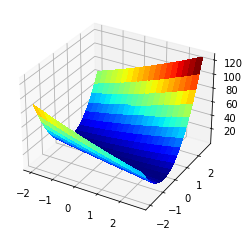

In [133]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = '3d')
b0 = np.arange(-2, 3, 0.25)
b1 = np.arange(-2, 3, 0.25)
B0, B1 = np.meshgrid(b0, b1) 
Z = suma_J(B0,B1)
ax.plot_surface(B0, B1, Z, rstride=1, cstride=1, cmap=cm.jet,
        linewidth=0, antialiased=False)

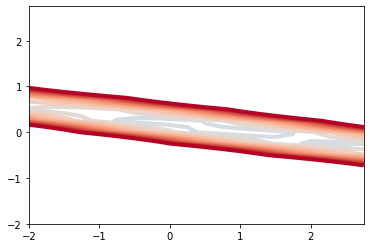

In [134]:
levels = np.arange(-2, 3, 0.25 )
plt.contour(B0, B1, Z,levels ,linewidths=4,cmap=cm.coolwarm);

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.


In [144]:
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(edad, altura)

La función convergió con beta: [0.69567582 0.07379435] en la iteración 8231


In [145]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

In [146]:
ultima_iteracion = (r.breaking_iteration - 1) if r.breaking_iteration else (r.max_iters - 1)

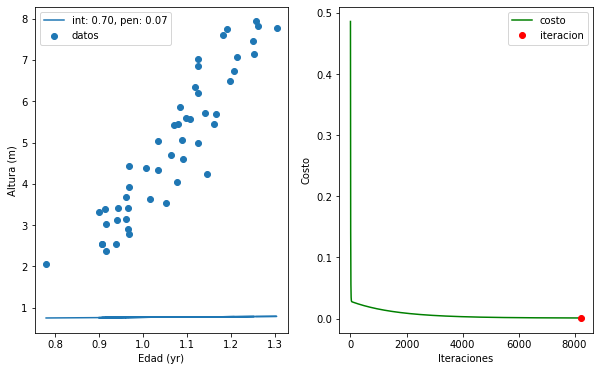

In [148]:
plotModelo(altura,edad, r,ultima_iteracion )

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.


## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [4]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


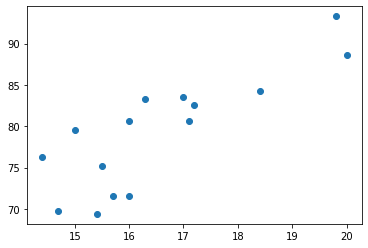

In [60]:
data = np.loadtxt('data/chirps.txt')
x=[]
y=[]
for i in data:
    x.append(float(i[0]))
    y.append(float(i[1]))
X = np.array(x)
Y = np.array(y)
plt.scatter(X,Y, label = "Chirps")

In [70]:
r2 = RegresionLineal(alpha=0.004, max_iters=10000, tols=0.0000001)
r2.gradientDescent(X,Y)

La función convergió con beta: [ 6.43861808 -0.54756165] en la iteración 5394


Al principio había utilizado la alfa que usamos en clase: 0.003. Sin embargo, con ese valor no obtuve resultado alguno. 
Después probé con 0.03, pero obtuve un error. 
Finalmente, al utilizar $\alpha = 0.004$ ya pude ver cuándo convergía la función 

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

In [75]:
x1 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
x2 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.1, 9.13, 7.26, 4.74]
x3 = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0]
y4 = [6.58, 5.76, 7.71, 8.884, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]


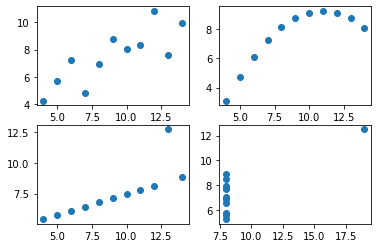

In [76]:
X1 = np.array(x1)
Y1 = np.array(y1)
X2 = np.array(x2)
Y2 = np.array(y2)
X3 = np.array(x3)
Y3 = np.array(y3)
X4 = np.array(x4)
Y4 = np.array(y4)

fig, ax = plt.subplots(2,2)
ax[0,0].scatter(X1,Y1)
ax[0,1].scatter(X2,Y2)
ax[1,0].scatter(X3,Y3)
ax[1,1].scatter(X4,Y4)

In [78]:
r1 = RegresionLineal(alpha=0.004, max_iters=10000, tols=0.0000001)
r1.gradientDescent(X1,Y1)

La función convergió con beta: [2.95439536 0.50461566] en la iteración 9549


In [79]:
r3 = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r3.gradientDescent(X,Y)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


In [80]:
r3 = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r3.gradientDescent(X,Y)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


In [81]:
r3 = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r3.gradientDescent(X,Y)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


## Problema 5

Use el archivo `radioactive_decay.dat`

In [5]:
%cat dat a/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

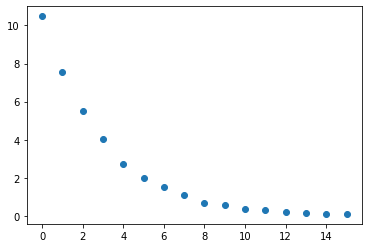

In [149]:
datos = np.loadtxt("data/radioactive_decay.txt")
x = []
y = []
for i in datos:
    x.append(float(i[0]))
    y.append(float(i[1]))
X= np.array(x)
Y=np.array(y)
plt.scatter(X,Y, label = "Radioactive decay")

Tiene la forma de la función logarítmica

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

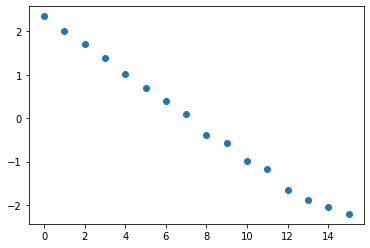

In [151]:
yt = [np.log(i) for i in y]
plt.scatter(x,yt)

In [169]:
archivo = open ('data/transform_radioactive_decay.txt','w')
for i in range(0,16):
    archivo.write(str(x[i]))
    archivo.write(str(yt[i]))
archivo.close()
    

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

In [160]:
YT = np.array(yt)
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, YT)

La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [156]:
YT = np.array(yt)

In [157]:
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, YT)


La función convergió con beta: [ 2.27548901 -0.31459673] en la iteración 5755


In [158]:
r.beta

array([ 2.27548901, -0.31459673])

In [161]:
r = RegresionLineal(alpha=0.003, max_iters=10000, tols=0.0000001)
r.gradientDescent(X, Y)

La función convergió con beta: [ 6.43577297 -0.54728535] en la iteración 7016


In [162]:
r.beta

array([ 6.43577297, -0.54728535])

In [163]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")

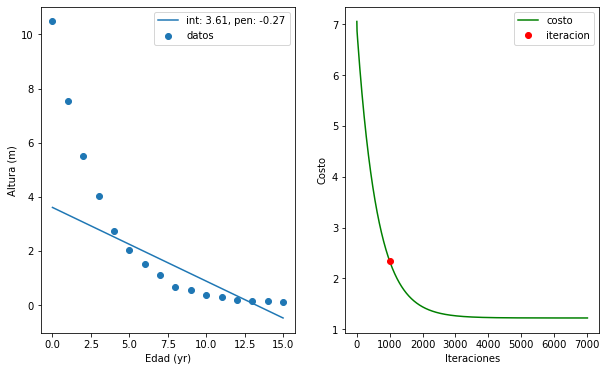

In [165]:
plotModelo(X,Y,r,1000)